In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
data = pd.read_csv(r'yt.csv').drop_duplicates(subset=['title'])
print(data.shape)
data.head()

(2938, 12)


,categoryId,channelId,channelTitle,commentCount,dislikeCount,likeCount,publishedat,subscriberCount,tags,title,videoId,viewCount
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22,UCogMqojFxwDqvz2OBNTJkjg,Odia Beauty & Lifestyle,2010,198,11737,2020-10-28T04:07:13Z,114000,"['Odia Vlogger Ritu', 'Odia Vlogger Rashmita',...",ଜୀବନର ସବୁଠୁ ବଡ ଦୁଃଖ|Odia Beauty &amp; Lifestyle,TXr11CvOze4,162653
3,26,UC2etEuPIfohP4P53wM0KImA,5-Minute Crafts GIRLY,1030,3250,30524,2020-09-27T00:00:01Z,19500000,"['women', 'girly', 'proyectos faciles', '5-min...",27 Beauty And Makeup Hacks For Girls,EkGOC5gs1ao,3338010
5,26,UC63mNFJR8EAb8wAIJwoCmTA,5-Minute Crafts FAMILY,993,3021,33053,2020-09-14T08:17:53Z,10800000,"['parents', 'how to', 'howto', 'tutorial', 'ch...",Incredible Beauty Hacks For Girls,0EDhpTTehOw,3873510
7,1,UC9nKeBeLeRGuwy1lsYU8wlg,Dream Stories TV Adventure,538,5378,17424,2020-10-08T04:15:01Z,4500000,"['Hindi Stories', 'Latest kahaniya', 'Kahani',...",चुड़ैल का ब्यूटी पार्लर | Haunted Beauty Parlou...,46uRx5UmWTU,3196671


In [10]:
data.isna().sum()

categoryId         1
channelId          1
channelTitle       1
commentCount       1
dislikeCount       1
likeCount          1
publishedat        1
subscriberCount    1
tags               1
title              1
videoId            1
viewCount          1
dtype: int64

In [11]:
data['commentCount'] = pd.to_numeric(data['commentCount'], errors='coerce')
data['likeCount'] = pd.to_numeric(data['likeCount'], errors='coerce')
data['viewCount'] = pd.to_numeric(data['viewCount'], errors='coerce')
data['dislikeCount'] = pd.to_numeric(data['dislikeCount'], errors='coerce')
data['subscriberCount'] = pd.to_numeric(data['subscriberCount'], errors='coerce')
data['categoryId'] = pd.to_numeric(data['categoryId'], errors='coerce')
data = pd.DataFrame(data,columns= ['viewCount', 'likeCount','commentCount','dislikeCount','subscriberCount','categoryId'])

In [12]:
data2 = data[data.categoryId==24]
data1 = data[data.categoryId==23]
data3 = data[data.categoryId==20]
data4 = data[data.categoryId==22]
data5 = data[data.categoryId==1]
data6 = data[data.categoryId==19]
print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)
print(data5.shape)
print(data6.shape)

data1=data1.append(data2)
data1=data1.append(data3)
data1=data1.append(data4)
data1=data1.append(data5)
data1=data1.append(data6)
data1.shape
data1

(107, 6)
(781, 6)
(71, 6)
(388, 6)
(190, 6)
(45, 6)


,viewCount,likeCount,commentCount,dislikeCount,subscriberCount,categoryId
149,9561711.0,143882.0,5532.0,5898.0,1490000.0,23.0
231,29392974.0,327413.0,5449.0,21544.0,8330000.0,23.0
339,1380592.0,53790.0,687.0,1345.0,1350000.0,23.0
391,41938706.0,604161.0,109924.0,21140.0,15900000.0,23.0
411,253751.0,18979.0,1251.0,1098.0,972000.0,23.0
...,...,...,...,...,...,...
13241,152837.0,2037.0,77.0,82.0,137000.0,19.0
13671,6312.0,787.0,74.0,5.0,598000.0,19.0
13751,6733.0,674.0,213.0,22.0,127000.0,19.0
13759,4373.0,210.0,21.0,6.0,34300.0,19.0


In [13]:
data1=data1.reset_index(drop=True)
data1 = data1[data1.subscriberCount!= 0]
pc=list()
for i in data1.index:
    pc.append(data1['likeCount'][i]/data1['viewCount'][i]) 
data1['ratio']=pc
data1
data1=data1.dropna()
data1.shape

(1461, 7)

In [14]:
data1.isna().sum()
data1=data1.dropna()

In [15]:
len(data1['ratio'])

1461

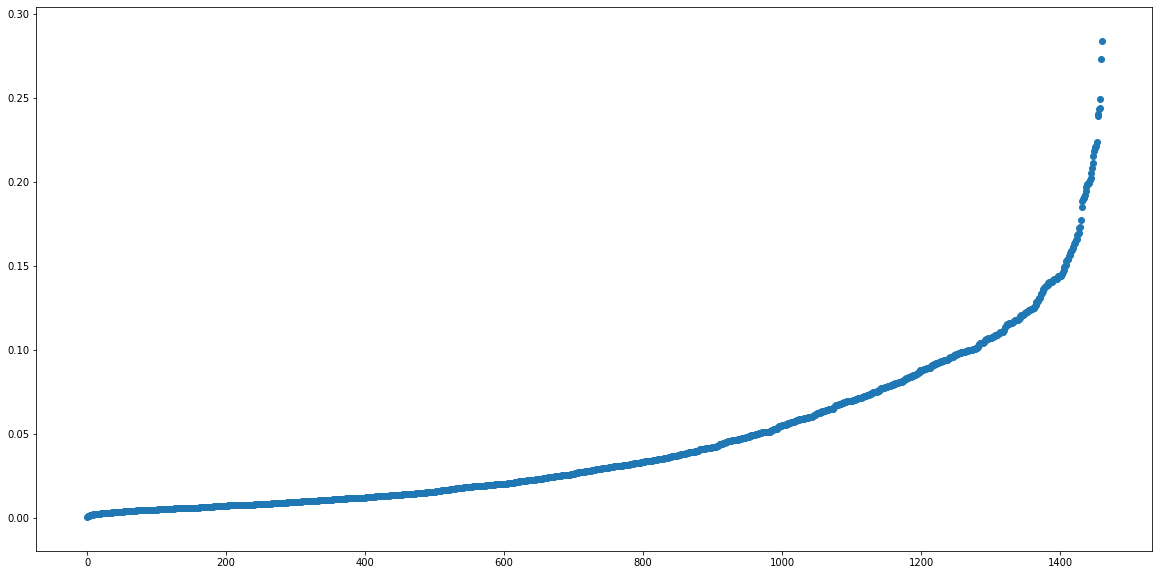

In [17]:
pc_sort=pc.sort
#print(pc_sort)
y=data1['ratio']
x=[i for i in range(0,1461)]
data1=data1.sort_values(['ratio'])
plt.scatter(x,y)

In [18]:
print(np.percentile(data1['ratio'], 33))
print(np.percentile(data1['ratio'], 66))
print(np.percentile(data1['ratio'], 100))

0.01459152972760593
0.04984903459813204
0.2836607570675611


In [19]:
l=list()
for i in data1.index:
    if(data1['ratio'][i]>0.0498):
        l.append("High")
    elif(data1['ratio'][i]<0.0145):
        l.append("Low")
    else:
        l.append("Medium")
print(len(l))
data1["popularity"]=l
print(data1[data1["popularity"]=="High"].shape)
print(data1[data1["popularity"]=="Medium"].shape)
print(data1[data1["popularity"]=="Low"].shape)

1461
(497, 8)
(484, 8)
(480, 8)


In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data1['popularity'] = le.fit_transform(data1['popularity'])
data1=data1.dropna()

In [21]:
data1.reset_index(drop=True, inplace=True)
data1

,viewCount,likeCount,commentCount,dislikeCount,subscriberCount,categoryId,ratio,popularity
0,2597667.0,1064.0,27.0,406.0,32700.0,24.0,0.000410,1
1,1743338.0,1550.0,244.0,892.0,6100.0,22.0,0.000889,1
2,4881362.0,5300.0,849.0,375.0,3860000.0,24.0,0.001086,1
3,4964603.0,5675.0,278.0,1702.0,289000.0,1.0,0.001143,1
4,3138599.0,3889.0,152.0,1729.0,62600.0,24.0,0.001239,1
...,...,...,...,...,...,...,...,...
1456,47735.0,11620.0,1358.0,498.0,259000.0,24.0,0.243427,0
1457,5523.0,1346.0,182.0,24.0,32900.0,22.0,0.243708,0
1458,76054.0,18969.0,2676.0,133.0,1540000.0,23.0,0.249415,0
1459,15417.0,4209.0,711.0,69.0,66400.0,23.0,0.273010,0


In [22]:
X = data1.drop(['popularity','ratio','categoryId'],axis=1)
Y=data1['popularity'] 
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test = tts(X,Y, test_size = 0.20, shuffle=True)
#Feature scaling

from sklearn.preprocessing import RobustScaler as RS
scaler = RS()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Error Rate')

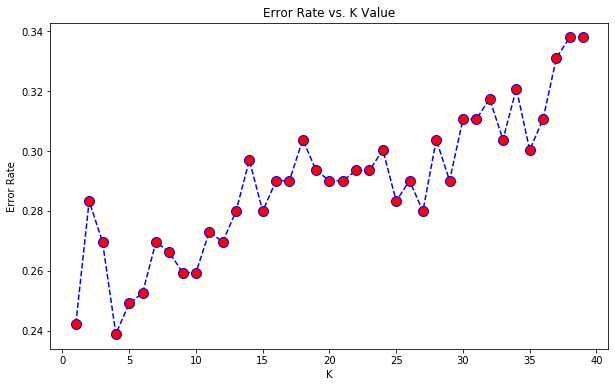

In [23]:
from sklearn.metrics import classification_report as cr, confusion_matrix as cm, accuracy_score as acc_s
from sklearn.neighbors import KNeighborsClassifier 
error_rate = []
# Will take some time
for i in range(1,40):
 
    knn =  KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Maximum accuracy:- 0.7610921501706485 at K = 3


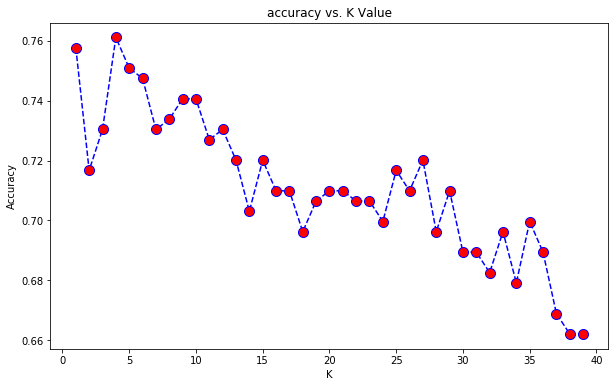

In [24]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, yhat))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [25]:
#Training 

from sklearn.neighbors import KNeighborsClassifier as KNC


classifier = KNC(n_neighbors = 3 )
classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report as cr, confusion_matrix as cm, accuracy_score as acc_s

print("Confusion Matrix : \n", cm(Y_test,Y_pred))
print("\n\nClassification report : \n", cr(Y_test,Y_pred))
print("\n\nAccuracy : ", acc_s(Y_test,Y_pred)*100)

Confusion Matrix : 
 [[72  1 15]
 [ 1 80 13]
 [31 18 62]]


Classification report : 
               precision    recall  f1-score   support

           0       0.69      0.82      0.75        88
           1       0.81      0.85      0.83        94
           2       0.69      0.56      0.62       111

    accuracy                           0.73       293
   macro avg       0.73      0.74      0.73       293
weighted avg       0.73      0.73      0.72       293



Accuracy :  73.03754266211604


In [27]:
from sklearn.model_selection import cross_val_score
def Average(lst): 
    return sum(lst) / len(lst) 
x=cross_val_score(classifier,X_train,Y_train,cv=10)
avg_score = Average(x)
print(avg_score)
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
multiclass_roc_auc_score(Y_test,Y_pred)

0.7354479811376362


0.8037305174618624

In [28]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
#classifier._params_

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print("\n\nAccuracy : ", acc_s(Y_test,y_pred))

[[82  0  6]
 [ 0 82 12]
 [16 20 75]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        88
           1       0.80      0.87      0.84        94
           2       0.81      0.68      0.74       111

    accuracy                           0.82       293
   macro avg       0.82      0.83      0.82       293
weighted avg       0.81      0.82      0.81       293



Accuracy :  0.8156996587030717


In [30]:
#dec tree
x_dec_tree=cross_val_score(classifier,X_train,Y_train,cv=10)
avg_score = Average(x_dec_tree)
print(avg_score)
multiclass_roc_auc_score(Y_test,y_pred)

0.8569997052755675


0.8670636485123424

In [31]:
from sklearn.ensemble import RandomForestClassifier
r_clf=RandomForestClassifier(random_state=0)
r_clf.fit(X_train,Y_train)
r_pred=r_clf.predict(X_test)
print("Confusion Matrix : \n", cm(Y_test,r_pred))
print("\n\nClassification report : \n", cr(Y_test,r_pred))
print("\n\nAccuracy : ", acc_s(Y_test,r_pred)*100)
from sklearn.model_selection import cross_val_score
x_random_forest=cross_val_score(r_clf,X_train,Y_train,cv=10)
avg_score_randomforest = Average(x_random_forest)
print("average cross validation score:",avg_score_randomforest)
print("ROC AUC:",multiclass_roc_auc_score(Y_test,r_pred))

Confusion Matrix : 
 [[83  0  5]
 [ 0 86  8]
 [14 15 82]]


Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        88
           1       0.85      0.91      0.88        94
           2       0.86      0.74      0.80       111

    accuracy                           0.86       293
   macro avg       0.86      0.87      0.86       293
weighted avg       0.86      0.86      0.85       293



Accuracy :  85.6655290102389
average cross validation score: 0.8793029767167697
ROC AUC: 0.896952672527387


In [97]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [98]:
rf_pred1=rf_random.predict(X_test)

In [99]:
x=zip(Y_test,rf_pred1)

In [100]:
tuple(x)

((1, 1),
 (2, 0),
 (0, 0),
 (0, 0),
 (2, 2),
 (2, 2),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (2, 2),
 (1, 2),
 (2, 2),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (2, 2),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (2, 0),
 (1, 1),
 (2, 2),
 (0, 0),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (1, 1),
 (0, 2),
 (0, 0),
 (2, 0),
 (0, 0),
 (2, 2),
 (0, 0),
 (1, 1),
 (1, 1),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (1, 1),
 (1, 1),
 (0, 0),
 (2, 2),
 (0, 2),
 (0, 0),
 (2, 2),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (2, 2),
 (0, 0),
 (0, 0),
 (1, 2),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (2, 2),
 (0, 0),
 (2, 2),
 (1, 1),
 (2, 2),
 (2, 2),
 (2, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (2, 2),
 (1, 1),
 (2, 2),
 (1, 2),
 (0, 0),
 (1, 1),
 (2, 2),
 (2, 2),
 (2, 0),
 (2, 2),
 (0, 0),
 (0, 0),
 (0, 0),
 (2, 1),
 (1, 1),
 (2, 1),
 (2, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (2, 2),
 (1, 1),
 (1, 1),
 (2, 2),
 (2, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 

In [101]:
#random forest with grid search
print("Confusion Matrix : \n", cm(Y_test,rf_pred1))
print("\n\nClassification report : \n", cr(Y_test,rf_pred1))
print("\n\nAccuracy : ", acc_s(Y_test,rf_pred1)*100)

Confusion Matrix : 
 [[100   0   5]
 [  0  77   6]
 [  7   8  90]]


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.91      0.93      0.92        83
           2       0.89      0.86      0.87       105

    accuracy                           0.91       293
   macro avg       0.91      0.91      0.91       293
weighted avg       0.91      0.91      0.91       293



Accuracy :  91.12627986348123


In [103]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [104]:
import pickle
pickle.dump(rf_random, open('modelfin.pkl','wb'))

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
r_gb=GradientBoostingClassifier(random_state=0,learning_rate=0.01,n_estimators=1000,max_depth=4)
r_gb.fit(X_train,Y_train)
r_gb_pred=r_gb.predict(X_test)
print("Confusion Matrix : \n", cm(Y_test,r_gb_pred))
print("\n\nClassification report : \n", cr(Y_test,r_gb_pred))
print("\n\nAccuracy : ", acc_s(Y_test,r_gb_pred)*100)
from sklearn.model_selection import cross_val_score
x_gb=cross_val_score(r_gb,X_train,Y_train,cv=10)
avg_score_gb = Average(x_gb)
print("average cross validation score",avg_score_gb)
#from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
print("ROC-AUC",multiclass_roc_auc_score(Y_test,r_gb_pred))

Confusion Matrix : 
 [[ 18   1  12]
 [  0 198   7]
 [  3   8  46]]


Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.58      0.69        31
           1       0.96      0.97      0.96       205
           2       0.71      0.81      0.75        57

    accuracy                           0.89       293
   macro avg       0.84      0.78      0.80       293
weighted avg       0.90      0.89      0.89       293



Accuracy :  89.419795221843
average cross validation score 0.8860963748894782
ROC-AUC 0.8598807966930281
